# Calculating Energy Surfaces of Binary Systems

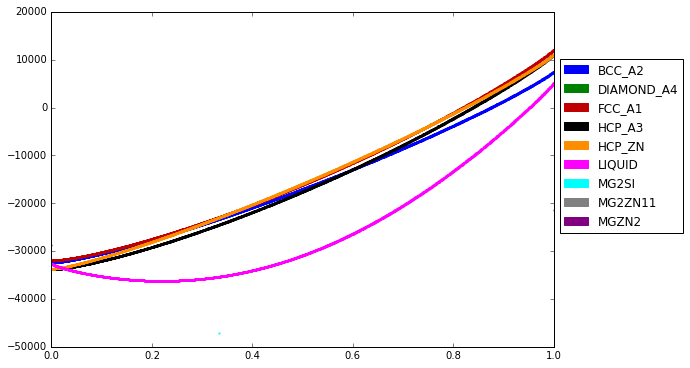

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

from pycalphad import Database, calculate
from pycalphad.plot.utils import phase_legend
import numpy as np

db = Database('Mg_Si_Zn.tdb')
my_phases = sorted(set(db.phases.keys()) - {'MG2ZN3', 'MG51ZN20', 'MGZN'})

legend_handles, colorlist = phase_legend(my_phases)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases:
    result = calculate(db, ['MG', 'SI', 'VA'], name, P=101325, T=800, output='GM')
    ax.scatter(result.X.sel(component='SI'), result.GM,
               marker='.', s=5, color=colorlist[name.upper()])
ax.set_xlim((0, 1))
ax.set_ylim((-50000, 2e4))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()

# Plotting Isobaric Binary Phase Diagrams with `binplot`

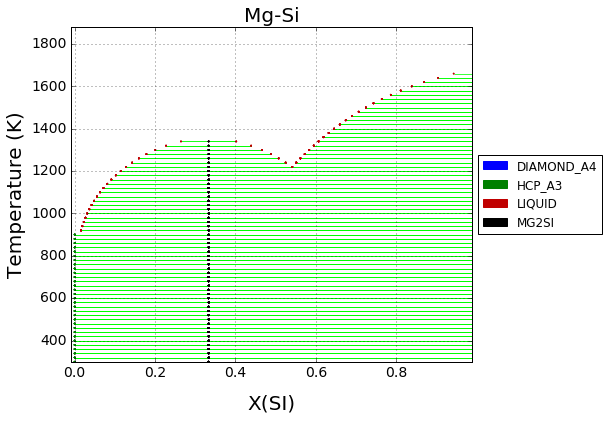

In [9]:
from pycalphad import binplot
import pycalphad.variables as v

fig = plt.figure(figsize=(9,6))
binplot(db, ['MG', 'SI', 'VA'] , my_phases, {v.X('SI'):(0,1,0.02),
                                             v.T: (300, 1900, 20), v.P:101325},  ax=fig.gca())
plt.show()